In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")


# Features Description



● ID - Customer ID.

● Age- Customer&#39;s age in completed years

● Experience - #years of professional experience

● Income - Annual income of the customer ($000)

● ZIPCode - Home Address ZIP code.

● Family - Family size of the customer

● CCAvg - Avg. spending on credit cards per month ($000)

● Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

● Mortgage - Value of house mortgage if any. ($000)

● Personal Loan - Did this customer accept the personal loan offered in the last campaign?

● Securities - Account Does the customer have a securities account with the bank?

● CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

● Online - Does the customer use internet banking facilities?

● CreditCard - Does the customer uses a credit card

In [81]:
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


# Primary Intuitions about the Dataset


1. ID column is just a row number, so we should get rid of this from the features list
2. ZIP code is in numberic form, but actually it's a categorical value. So we have to handle this before providing to model. Possible ways are  
    a. Get the distinct ZIP codes and convert that to one-hot encoded values.
    b. Check the correlation between ZIP code with 'Personal Loan' column.
   We need to check the performance with and without this column.
 
3. Mortgage column contains most of the values as 0. Need to check the correlation and confirm whether this feature has any impact on 'Personal Loan column'

4. There might be a chance of high correlation between Age and Experience

5. Even if user do not have this bank's credit card, they may be having credit card from different bank. 

# Data preprocessing

In [83]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [84]:
data["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [85]:
print("Number of customers who are under-graduates who showed interst for Personal Loan = ",data[(data["Education"] == 1) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who are graduates who showed interst for Personal Loan = ",data[(data["Education"] == 2) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who are professionals who showed interst for Personal Loan = ",data[(data["Education"] == 3) & data["Personal Loan"] ==1].count()[0])

Number of customers who are under-graduates who showed interst for Personal Loan =  93
Number of customers who are graduates who showed interst for Personal Loan =  182
Number of customers who are professionals who showed interst for Personal Loan =  205


In [86]:
data["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
91       16
89       16
90       15
102      15
78       15
118      14
101      14
87       14
94       14
131      14
104      14
109      13
106      13
116      13
144      13
112      13
81       13
185      12
76       12
120      12
97       12
121      12
100      12
158      11
184      11
       ... 
345       1
337       1
321       1
281       1
273       1
265       1
253       1
237       1
433       1
477       1
298       1
481       1
290       1
286       1
278       1
258       1
210       1
206       1
617       1
601       1
589       1
581       1
587       1
569       1
553       1
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [87]:
print("Number of customers who have no mortgage with bank and showed interst for Personal Loan = ",data[(data["Mortgage"] == 0) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who have mortgage with bank and showed interst for Personal Loan = ",data[(data["Mortgage"] != 0) & data["Personal Loan"] ==1].count()[0])

Number of customers who have no mortgage with bank and showed interst for Personal Loan =  312
Number of customers who have mortgage with bank and showed interst for Personal Loan =  168


In [88]:
data["Securities Account"].value_counts()


0    4478
1     522
Name: Securities Account, dtype: int64

In [106]:
print("Number of customers who have no Securities Account with bank and showed interst for Personal Loan = ",data[(data["Securities Account"] == 0) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who have Securities Account with bank and showed interst for Personal Loan = ",data[(data["Securities Account"] != 0) & data["Personal Loan"] ==1].count()[0])

Number of customers who have no Securities Account with bank and showed interst for Personal Loan =  420
Number of customers who have Securities Account with bank and showed interst for Personal Loan =  60


In [90]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [108]:
print("Number of customers who have no CD Account with bank and showed interst for Personal Loan = ",data[(data["CD Account"] == 0) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who have CD Account with bank and showed interst for Personal Loan = ",data[(data["CD Account"] != 0) & data["Personal Loan"] ==1].count()[0])

Number of customers who have no CD Account with bank and showed interst for Personal Loan =  340
Number of customers who have CD Account with bank and showed interst for Personal Loan =  140


In [92]:
data["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [109]:
print("Number of customers who have no Online Banking and showed interst for Personal Loan = ",data[(data["Online"] == 0) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who have Online banking and showed interst for Personal Loan = ",data[(data["Online"] != 0) & data["Personal Loan"] ==1].count()[0])

Number of customers who have no Online Banking and showed interst for Personal Loan =  189
Number of customers who have Online banking and showed interst for Personal Loan =  291


In [94]:
data["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [95]:
print("Number of customers who have no Credit Card and showed interst for Personal Loan = ",data[(data["CreditCard"] == 0) & data["Personal Loan"] ==1].count()[0])
print("Number of customers who have Credit Card and showed interst for Personal Loan = ",data[(data["CreditCard"] != 0) & data["Personal Loan"] ==1].count()[0])

Number of customers who have no Credit Card and showed interst for Personal Loan =  337
Number of customers who have Credit Card and showed interst for Personal Loan =  143


# Analysis of data distribution

In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1. Age of the Customers are distributed between 23 and 67 with no SKEWs(ignorably small right skew)
2. Experience of the Customers are distributed between -3 and 43. Since -3 is not a valid experience, it could possibly consider as human error. This should be resolved before feeding to Model. The distribution is not much SKEWed
3. Income is kind of RIght SKEWed. The Range of the distribution is comparatively high
4. Family ranges between 1 and 4
5. CCAvg is Right Skewed
6. Out of 5000, most of the customers are undergraduates. But, out of total 480 Personal loan costomers, more than 50% (205) are profesionals
7. Out of 5000, 3462 customers donot have mortgage with bank. Out of 480 responses, 312 customers, who showed interest for personal loan in campaign, have no Mortgage with bank
8. Only ~10% of customers have security account with the bank. Out of 480, 14% (60) of customers have Security Deposits with bank
9. Only 6% of users have CD account. But more than 40% of the CD Account holders showed interst for Personal Loan. 
10. Out of 480 users who showed interest for personal loan, 60% of the customers have Online Account. 
11. Out of 5000, only 30% have credit card. 30% of the customers who are interested in Personal loan has CreditCard 


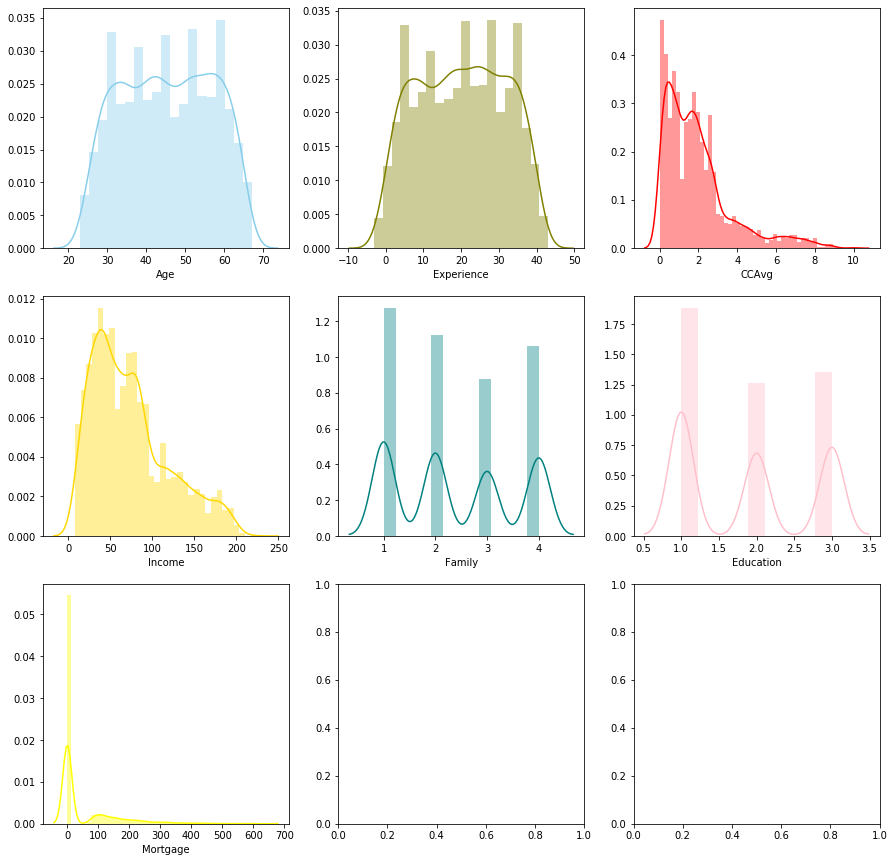

In [97]:
f,axes =plt.subplots(3,3,figsize=(15,15),sharex=False)
sns.distplot(data["Age"], color="skyblue", ax=axes[0, 0])
sns.distplot(data["Experience"] , color="olive", ax=axes[0, 1])
sns.distplot(data["Income"] , color="gold", ax=axes[1, 0])
sns.distplot(data["Family"] , color="teal", ax=axes[1, 1])
sns.distplot(data["CCAvg"] , color="red", ax=axes[0, 2])
sns.distplot(data["Education"] , color="pink", ax=axes[1, 2])
sns.distplot(data["Mortgage"] , color="yellow", ax=axes[2, 0])


# Finding Outliers

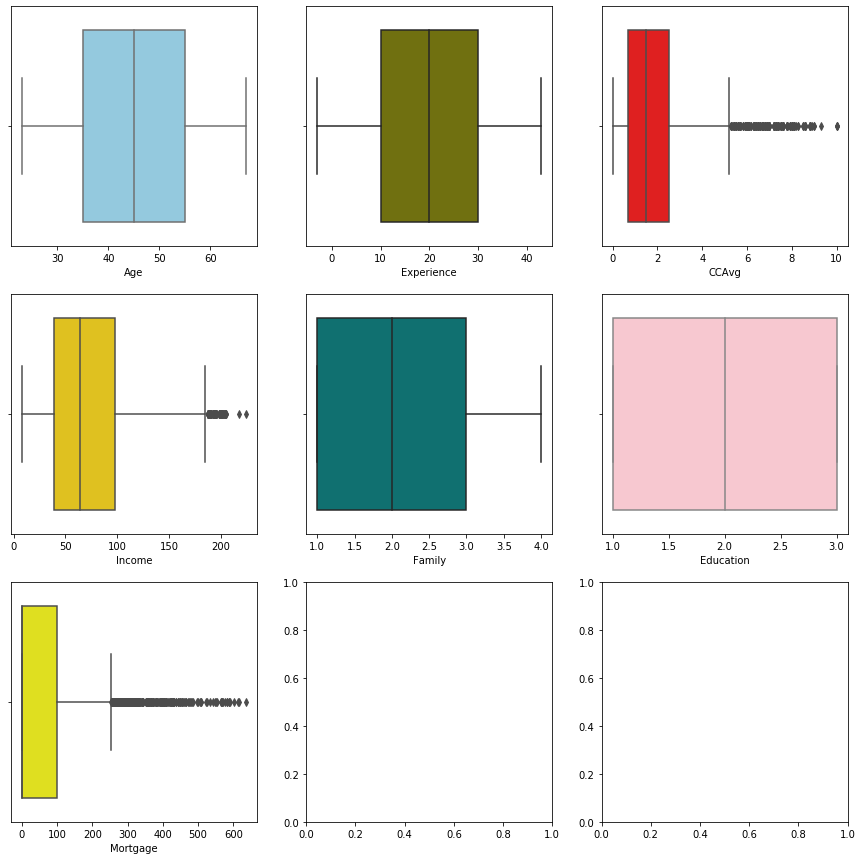

In [98]:
f, axes= plt.subplots(3,3,figsize=(15,15))
sns.boxplot(data["Age"], color="skyblue", ax=axes[0, 0])
sns.boxplot(data["Experience"] , color="olive", ax=axes[0, 1])
sns.boxplot(data["Income"] , color="gold", ax=axes[1, 0])
sns.boxplot(data["Family"] , color="teal", ax=axes[1, 1])
sns.boxplot(data["CCAvg"] , color="red", ax=axes[0, 2])
sns.boxplot(data["Education"] , color="pink", ax=axes[1, 2])
sns.boxplot(data["Mortgage"] , color="yellow", ax=axes[2, 0])

CCAvg, Income and Mortgage has numerous outliers


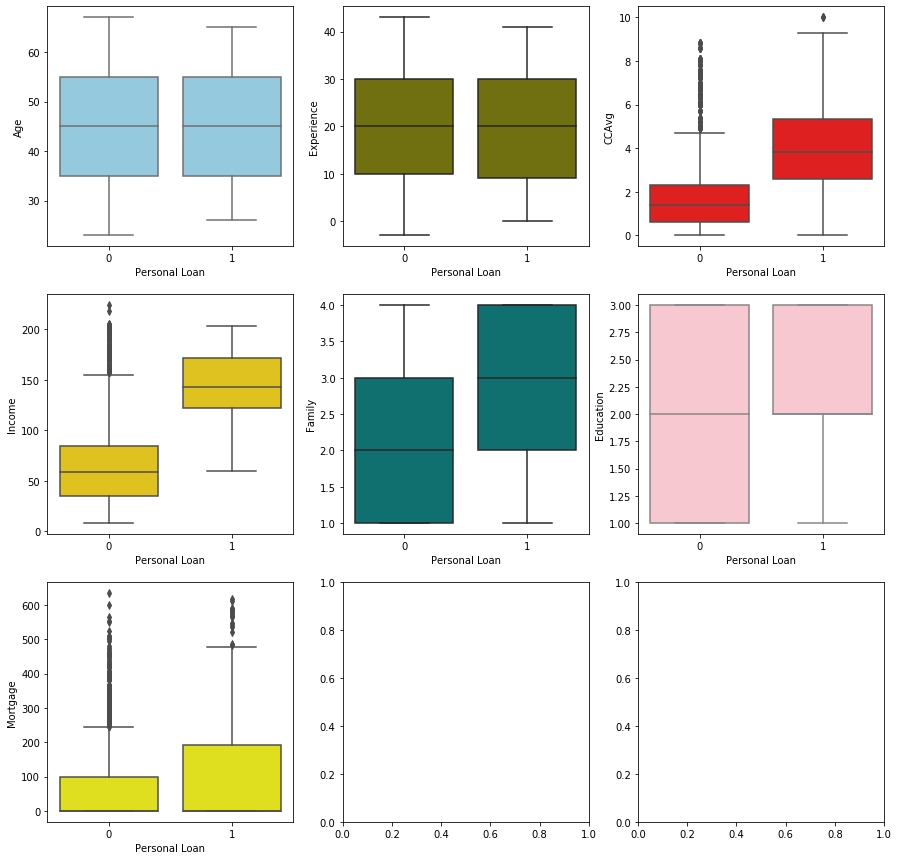

In [99]:
f, axes= plt.subplots(3,3,figsize=(15,15))
sns.boxplot(x=data["Personal Loan"],y = data["Age"], color="skyblue", ax=axes[0, 0])
sns.boxplot(x=data["Personal Loan"],y = data["Experience"] , color="olive", ax=axes[0, 1])
sns.boxplot(x=data["Personal Loan"],y = data["Income"] , color="gold", ax=axes[1, 0])
sns.boxplot(x=data["Personal Loan"],y = data["Family"] , color="teal", ax=axes[1, 1])
sns.boxplot(x=data["Personal Loan"],y = data["CCAvg"] , color="red", ax=axes[0, 2])
sns.boxplot(x=data["Personal Loan"],y = data["Education"] , color="pink", ax=axes[1, 2])
sns.boxplot(x=data["Personal Loan"],y = data["Mortgage"] , color="yellow", ax=axes[2, 0])

In [24]:
personalLoanCustomers = data[data["Personal Loan"] == 1]

personalLoanCustomers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,480.0,45.066667,11.590964,26.0,35.0,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.0,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0000,203.0
Family,480.0,2.612500,1.115393,1.0,2.0,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.0,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.0,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.0,1.0,1.0000,1.0
Securities Account,480.0,0.125000,0.331064,0.0,0.0,0.0,0.0000,1.0
CD Account,480.0,0.291667,0.455004,0.0,0.0,0.0,1.0000,1.0


In [25]:
nonPersonalLoanCustomers = data[data["Personal Loan"] == 0]

nonPersonalLoanCustomers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4520.0,45.367257,11.450427,23.0,35.0,45.0,55.0,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.0,20.0,30.0,43.0
Income,4520.0,66.237389,40.578534,8.0,35.0,59.0,84.0,224.0
Family,4520.0,2.373451,1.148771,1.0,1.0,2.0,3.0,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.6,1.4,2.3,8.8
Education,4520.0,1.843584,0.839975,1.0,1.0,2.0,3.0,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.0,0.0,98.0,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Securities Account,4520.0,0.102212,0.302961,0.0,0.0,0.0,0.0,1.0
CD Account,4520.0,0.035841,0.185913,0.0,0.0,0.0,0.0,1.0


In [100]:
personalLoanCustomers[(personalLoanCustomers["Income"] <= 200) & (personalLoanCustomers["Income"]>=110)].count()[0]

411

**Almost 90 percentage of the customers who showed interest for Personal Loan have income between 110K and 200K.**

In [101]:
#Evaluating the distribution of CCAvg for Personal Loan customers

personalLoanCustomers[(personalLoanCustomers["CCAvg"] <= 5.5) & (personalLoanCustomers["Income"]>=2.5)].count()[0]

374

In [103]:
nonPersonalLoanCustomers[(nonPersonalLoanCustomers["CCAvg"] <= 5.5) & (nonPersonalLoanCustomers["CCAvg"]>=2.5)].count()[0]

800

# Correlation

In [29]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


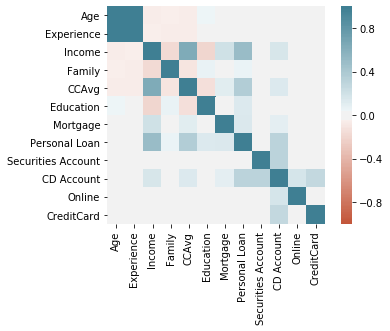

In [30]:
corr = data.corr()
ax = sns.heatmap(
    corr, xticklabels=corr.columns,
        yticklabels=corr.columns,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
       square=True
     )

# Correlation Analysis - Independent variables

1. Age and Experience has very strong positive correlation
2. Family and Income has a small negetive correlation
3. Income and CCAvg has strong positive correlation
4. Income and Education has negetive correlation
5. Family and CCAvg has a small negetive correlation
6. CD account has positive correlation with Securities Account, Online, Credit Card and CCAvg

# Correlation Analysis - Dependent Variable

1. Personal Loan has positive correlations with Income, CCAvg, CDAcount, Education
2. Personal Loan has negetive correlation with Mortgage

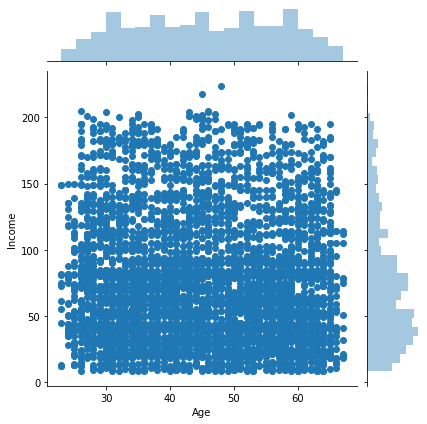

In [31]:
sns.jointplot(data["Age"],data["Income"])

The above charge shows there no relationship between Age and Income

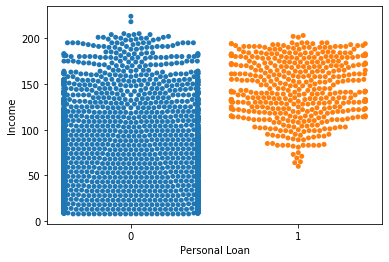

In [32]:
sns.swarmplot(data["Personal Loan"],data["Income"])

No costumers having income below 50K showed interest in obtaining loan.

More than 80% of the costomers who showed interset for loan have more than 100K income

# Intuitions based on Outliers and Correlation analysis

1. CCAvg
        -- CCAvg has a positive correlation with Personal Loan. If we analyze the outliers, there are numerous outliers exist for Class 0 category. Most of the outliers are after Q3. So CCAvg values can be utlized to create a new column- CCUsage which will have 4 values : a. Rarely Used(less than 2.5), b. Low Usage(2.5 - 5) c. High Usage (5-7.5) d. Very High Usage( more than 7.5). From the Boxplot, it's clear that, customers who showed interest fo personal loan lies in CCUsage 2 or 3

2. Income
        -- 90 percentage of Personal Loan customers' income ranges from 110K to 200K
        -- Income can be classified in 3 classes
            a. Low Income (less than 80)
            b. Medium Income (80-160)
            c. Rich (more than 160)
            
3. Mortgage
        -- From the data distribution, Most of the people showed interest for personal loan has no Mortgage with Bank. So it makes sense to create a new column 'HasMortgage' with only two columns

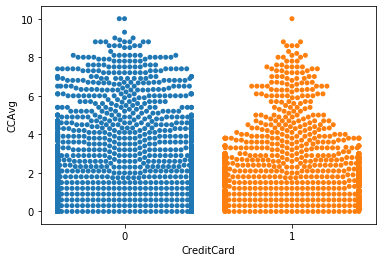

In [33]:
sns.swarmplot(data["CreditCard"],data["CCAvg"])

# Data Transformations

**Create a new columns CCUsage, IncomeStatus, HasMortgage, **

In [34]:

data["CCUsage"] = data.apply(lambda x: 1 if x.CCAvg < 3 else 2 if (x.CCAvg >= 3 and x.CCAvg <6) else 3 if (x.CCAvg >= 6 and x.CCAvg <8) else 4, axis=1)

In [35]:
data["IncomeStatus"] =data.apply(lambda x: 1 if x.Income <110 else 2 if x.Income>=110 and x.Income <180 else 3,axis=1)

In [36]:
data["HasMortgage"] = data.apply(lambda x: 0 if x.Mortgage == 0 else 1,axis=1)

In [37]:
data["Age_Scaled"] = data.apply(lambda x: (x.Age - data["Age"].mean())/data["Age"].std(),axis=1)

In [38]:
data["Experience_Scaled"] = data.apply(lambda x: (x.Age - data["Experience"].mean())/data["Experience"].std(),axis=1)

In [39]:
data.head(10)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCUsage,IncomeStatus,HasMortgage,Age_Scaled,Experience_Scaled
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,1,0,-1.774239,0.426877
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1,1,0,-0.029521,2.170867
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,1,0,-0.552936,1.647670
3,35,9,100,1,2.7,2,0,0,0,0,0,0,1,1,0,-0.901880,1.298872
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1,1,0,-0.901880,1.298872
5,37,13,29,4,0.4,2,155,0,0,0,1,0,1,1,1,-0.727408,1.473271
6,53,27,72,2,1.5,2,0,0,0,0,1,0,1,1,0,0.668367,2.868463
7,50,24,22,1,0.3,3,0,0,0,0,0,1,1,1,0,0.406659,2.606864
8,35,10,81,3,0.6,2,104,0,0,0,1,0,1,1,1,-0.901880,1.298872
9,34,9,180,1,8.9,3,0,1,0,0,0,0,4,3,0,-0.989116,1.211672


In [40]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCUsage,IncomeStatus,HasMortgage,Age_Scaled,Experience_Scaled
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.050260,-0.046324,-0.009545,1.000000,1.000000
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.044179,-0.037151,-0.008499,0.994215,0.994215
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,0.601603,0.843468,-0.003688,-0.055269,-0.055269
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,-0.119348,-0.176091,0.005037,-0.046418,-0.046418
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,0.883871,0.564645,-0.011398,-0.052012,-0.052012
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014,-0.139616,-0.177733,-0.000505,0.041334,0.041334
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,0.106280,0.185036,0.833466,-0.012539,-0.012539
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.372153,0.511646,0.029940,-0.007726,-0.007726
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.006393,-0.009453,-0.002221,-0.000436,-0.000436
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.135946,0.174106,0.040212,0.008043,0.008043


# Training and Testing 

**import modules and define custom functions**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module for splitting the entire dataset into training and testing dataset
from sklearn.model_selection import train_test_split

#import LogisticReGression Model
from sklearn.linear_model import LogisticRegression

#import NaiveBayes model
from sklearn.naive_bayes import GaussianNB

#import KNN model
from sklearn.neighbors import KNeighborsClassifier

#import SVM model
from sklearn.svm import SVC

#Import metrics modulel to calculate model performance
from sklearn import metrics

#import resample module for upsampling
from sklearn.utils import resample

# module for evaluating the feature dependecies with target variable
import statsmodels.formula.api as sm

# module for cross validation
from sklearn.model_selection import cross_val_score 

# module for AUC-ROC Calculation
from sklearn.metrics import roc_curve, auc

# for SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

def drop_columns(df, col_names,inplace=False):
    print("--------Dropping columns-----")
    return df.drop(col_names,inplace = inplace, axis=1)


def transform_data(df):
    
    # Create a new column CCUsage from CCAvg column
    df["CCUsage"] = df.apply(lambda x: 1 if x.CCAvg < 3 else 2 if (x.CCAvg >= 3 and x.CCAvg <6) else 3 if (x.CCAvg >= 6 and x.CCAvg <8) else 4, axis=1)
    
    # Create a new column IncomeStatus from Income
    df["IncomeStatus"] =df.apply(lambda x: 1 if x.Income <110 else 2 if x.Income>=110 and x.Income <180 else 3,axis=1)
    
    # Create a new column HasMortage from Mortage
    df["HasMortgage"] = df.apply(lambda x: 0 if x.Mortgage == 0 else 1,axis=1)
    
    # Scale the Age Column as a new column
    df["Age_Scaled"] = df.apply(lambda x: (x.Age - df["Age"].mean())/df["Age"].std(),axis=1)
    
    # New column after scaling experience column
    df["Experience_Scaled"] = df.apply(lambda x: (x.Age - df["Experience"].mean())/df["Experience"].std(),axis=1)
    
    return df

    
    
def get_features_and_target(df,target_column_name):
    X=df.drop([target_column_name],axis=1)
    y=df[target_column_name]    
    return X,y


def upsample_data(df,target_column_name, minority_class, majority_class, number_of_samples):
    majority=df[df[target_column_name] == majority_class]
    minority=df[df[target_column_name] == minority_class]
    minority_upsampled = resample(minority,replace=True,n_samples = number_of_samples)
    upsampled=pd.concat([minority_upsampled,majority])
    return upsampled    


def train_model(algorithm_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)     
    
    print("#############Evaluating the Performance of ",algorithm_name,"#############")    
    
    evaluate_performance(model, X_train,y_train, X_test, y_test)
    
    print("#############Evaluation Completed for ",algorithm_name," ###################")
    
def evaluate_performance(model, X_train, y_train, X_test, y_test):   
    
    y_predict = model.predict(X_test) 
    
    print("\n")
    print("Confusion Metrics:")
    print(metrics.confusion_matrix(y_test, y_predict))
    
    print("\n")
    print("Model Performance Summary:")
    print(metrics.classification_report(y_test, y_predict))
    
    print("Evaluating the Cross Validation score")
    
    accuracies= cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5) 
    accuracies_mean=accuracies.mean()*100
    print("Mean Accuracy:",accuracies_mean)

    accuracies_std=accuracies.std()*100
    print("Standard Deviation:",accuracies_std)
    
    plot_auc_roc_curve(y_test, y_predict)
    
def plot_auc_roc_curve(y_test,y_pred):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def evaluate_bestK(X_train,y_train, X_test, y_test):
    error_rate = []

    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50), error_rate,color = "green", linestyle="dashed", marker = "o", markerfacecolor='red',markersize=10)
    plt.title("Error Rate vs K")
    plt.xlabel('K')
    plt.ylabel('Error Rate')

**Load dataset**

In [52]:
#load the dataset and assign to a variable. We should not alter the dataset, rather we have derive the dataset for our model training
dataset = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


**Drop columns ID and Zip Code**

In [53]:
#Drop the columns ID and ZIP code
data = drop_columns(df=dataset,col_names =["ID","ZIP Code"])

data.head(10)

--------Dropping columns-----


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


**Generate extra columns from CCAvg, Income and Mortgage**

In [54]:
data = transform_data(data)

data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCUsage,IncomeStatus,HasMortgage,Age_Scaled,Experience_Scaled
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,1,0,-1.774239,0.426877
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1,1,0,-0.029521,2.170867
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,1,0,-0.552936,1.647670
3,35,9,100,1,2.7,2,0,0,0,0,0,0,1,1,0,-0.901880,1.298872
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1,1,0,-0.901880,1.298872
5,37,13,29,4,0.4,2,155,0,0,0,1,0,1,1,1,-0.727408,1.473271
6,53,27,72,2,1.5,2,0,0,0,0,1,0,1,1,0,0.668367,2.868463
7,50,24,22,1,0.3,3,0,0,0,0,0,1,1,1,0,0.406659,2.606864
8,35,10,81,3,0.6,2,104,0,0,0,1,0,1,1,1,-0.901880,1.298872
9,34,9,180,1,8.9,3,0,1,0,0,0,0,4,3,0,-0.989116,1.211672


**Drop columns "CCAvg","Mortgage","Income","Experience","Age". The decision is made after trying different features. For feature selection, I have used Correlation Analysis, Outlier evaluation and Backward Elimination Technique**

In [55]:
col_drop = ["CCAvg","Mortgage","Income","Experience","Age"]

data = drop_columns(df = data, col_names = col_drop)

data.head()

--------Dropping columns-----


,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCUsage,IncomeStatus,HasMortgage,Age_Scaled,Experience_Scaled
0,4,1,0,1,0,0,0,1,1,0,-1.774239,0.426877
1,3,1,0,1,0,0,0,1,1,0,-0.029521,2.170867
2,1,1,0,0,0,0,0,1,1,0,-0.552936,1.647670
3,1,2,0,0,0,0,0,1,1,0,-0.901880,1.298872
4,4,2,0,0,0,0,1,1,1,0,-0.901880,1.298872


**Split dataset into features and target variable**

In [56]:
X, y = get_features_and_target(data, "Personal Loan")

print(X.shape)
print(y.shape)

(5000, 11)
(5000,)


**Split data into testing and training**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Logistic Regression

#############Evaluating the Performance of  Logistic Regression #############


Confusion Metrics:
[[1353   19]
 [  58   70]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.79      0.55      0.65       128

    accuracy                           0.95      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.94      0.95      0.94      1500

Evaluating the Cross Validation score
Mean Accuracy: 93.77113253583899
Standard Deviation: 0.6265806996013187


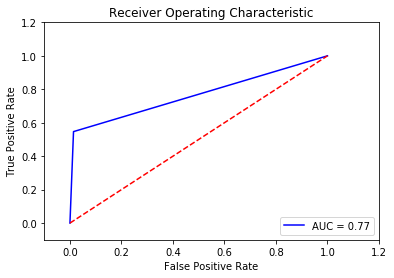

#############Evaluation Completed for  Logistic Regression  ###################


In [104]:
Logistic_regression_model = LogisticRegression()
train_model("Logistic Regression", Logistic_regression_model, X_train, X_test, y_train, y_test)

**When we are training the data with Logistic Regression model, there should not be any multicollinearity between independent variables and the Outliers should be handled prior to training.**

**To handle outliers, I have derived 3 new columns -- CCAvg to 4 ranges for CCUsage,  Income into 3 Income ranges and Mortgage to 2 classes. This gave me better result than using the raw columns(please look at the features selected for training the model)**

**Age and Experience columns are scaled and used in the Model traing**


**-----------------------------------------RESULT------------------------------------------------------------------------**

**Logistic Regression correctly identified 97 percentage  of people who are not willing to get the loan with 96 percentage precision**

**Logistic Regression correctly identified 65 percentage  of people who are willing to get the loan with 79 percentage precision**



# Naive Bayes

#############Evaluating the Performance of  Naive Bayes #############


Confusion Metrics:
[[1266  106]
 [  61   67]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1372
           1       0.39      0.52      0.45       128

    accuracy                           0.89      1500
   macro avg       0.67      0.72      0.69      1500
weighted avg       0.91      0.89      0.90      1500

Evaluating the Cross Validation score
Mean Accuracy: 87.39953113606937
Standard Deviation: 1.0332676020439653


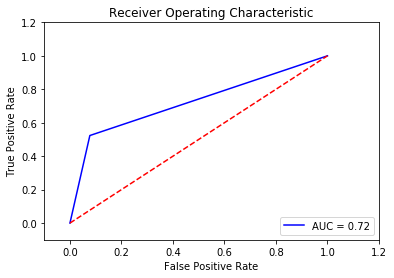

#############Evaluation Completed for  Naive Bayes  ###################


In [110]:
nb_model = GaussianNB()
train_model("Naive Bayes", nb_model, X_train, X_test, y_train, y_test)



**Naive Bayes model provide poor result compared to Logistic Regression**


# KNN

#############Evaluating the Performance of  KNN #############


Confusion Metrics:
[[1359   13]
 [  38   90]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.87      0.70      0.78       128

    accuracy                           0.97      1500
   macro avg       0.92      0.85      0.88      1500
weighted avg       0.96      0.97      0.96      1500

Evaluating the Cross Validation score
Mean Accuracy: 95.91391166104421
Standard Deviation: 0.5190495314869781


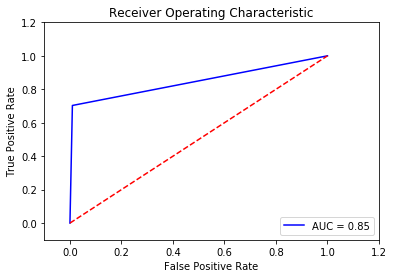

#############Evaluation Completed for  KNN  ###################


In [111]:
knn_model = KNeighborsClassifier(n_neighbors= 2,weights="distance")
train_model("KNN", knn_model, X_train, X_test, y_train, y_test)



**Evaluate best value for K**

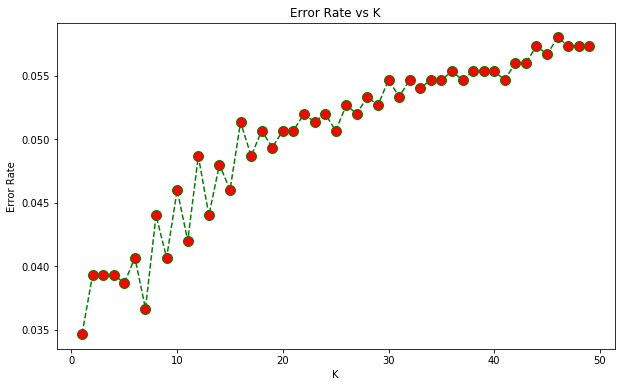

In [112]:
evaluate_bestK(X_train, y_train, X_test,  y_test)

**Best value of K is 2**

**Since the performance of the model will highly impacted by unscaled feature columns, I have used scaled Age and Experience values. This gave me much better result**

**Accuracy for non-PersonalLoan customers is 98 percentage**

**Acuracy for Personal Loan customers is 78 percentage**

**Better result than Logistic Regression**


# SVM

#############Evaluating the Performance of  SVM #############


Confusion Metrics:
[[1361   11]
 [  21  107]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1372
           1       0.91      0.84      0.87       128

    accuracy                           0.98      1500
   macro avg       0.95      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500

Evaluating the Cross Validation score
Mean Accuracy: 97.1712196497194
Standard Deviation: 0.6678762689746744


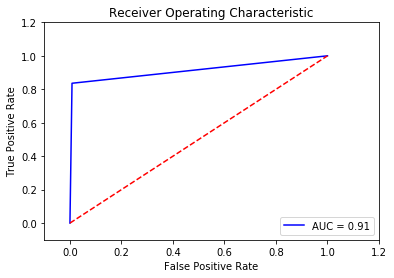

#############Evaluation Completed for  SVM  ###################


In [105]:
svc_model = SVC()
train_model("SVM", svc_model, X_train, X_test, y_train, y_test)

**Grid Search for SVM hyperparameter tuning**

In [78]:
param_grid = {'C': [0.1,1,5,7,8,9,10, 100, 1000], 'gamma': [1,0.1,0.01,0.002,0.0005,0.001,0.0001], 'kernel': ['rbf']} 


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.900, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.937, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.940, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.939, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.899, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.900, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.900, total=   0.1s
[CV] C=0.1, gamma=0.002, kernel=rbf ..................................
[CV] .

[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.899, total=   0.1s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.900, total=   0.1s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=5, gamma=0.0001, kernel=rbf, score=0.900, total=   0.1s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.959, total=   0.3s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.969, total=   0.3s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.963, total=   0.3s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=7, gamma=0.1, kernel=rbf, score=0.978, total=   0.1s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ....... C=9, gamma=0.0005, kernel=rbf, score=0.916, total=   0.1s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.929, total=   0.1s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.930, total=   0.1s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.940, total=   0.1s
[CV] C=9, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=9, gamma=0.0001, kernel=rbf, score=0.899, total=   0.1s
[CV] C=9, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=9, gamma=0.0001, kernel=rbf, score=0.900, total=   0.1s
[CV] C=9, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=9, gamma=0.0001, kernel=rbf, score=0.900, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ..... C=1000, gamma=0.002, kernel=rbf, score=0.974, total=   0.1s
[CV] C=1000, gamma=0.002, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.002, kernel=rbf, score=0.967, total=   0.1s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0005, kernel=rbf, score=0.954, total=   0.1s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0005, kernel=rbf, score=0.955, total=   0.1s
[CV] C=1000, gamma=0.0005, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0005, kernel=rbf, score=0.948, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.959, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.968, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   22.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 7, 8, 9, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.002, 0.0005, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

**Best model among the 4 models used**

**99 percentage accuracy in identifying non-PersonalLoan customer**

**87 percentage accuracy in identifing PersonalLoan customer**

# Conclusion


**If we use SVM model, with overall 97.17(+- 0.067) percentage confidence, we can say whether a user could be a possible Personal Loan customer or not.**


**In order to improve the Asset Customer base, bank has to target Professionals having income in between 110K and 200K**